In [1]:
# common packages 
import numpy as np 
import os
import copy
from math import *
import matplotlib.pyplot as plt
from functools import reduce
# reading in dicom files
import pydicom
# skimage image processing packages
from skimage import measure, morphology
#from skimage.morphology impo190rt ball, binary_closing
from skimage.measure import label, regionprops
# scipy linear algebra functions 
from scipy.linalg import norm
import scipy.ndimage
# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets
# plotly 3D interactive graphs 
import plotly
from plotly.graph_objs import *
#import chart_studio.plotly as py
# set plotly credentials here 
# this allows you to send results to your account plotly.tools.set_credentials_file(username=your_username, api_key=your_key)
import nrrd
import cv2

In [2]:
import os
import shutil

# Percorso della cartella contenente i file
folder_path = "\\Users\\bsbar\\Desktop\\pazienti_nrrd"

# Scansione dei file nella cartella
for filename in os.listdir(folder_path):
    # Percorso completo del file
    file_path = os.path.join(folder_path, filename)
    
    # Verifica se il file è un file regolare e termina con '.nrrd'
    if os.path.isfile(file_path) and filename.endswith('.nrrd'):
        # Estrai il nome della cartella
        folder_name = filename.split('.')[0]
        
        # Crea la cartella se non esiste già
        folder_path_new = os.path.join(folder_path, folder_name)
        if not os.path.exists(folder_path_new):
            os.makedirs(folder_path_new)
        
        # Sposta il file nella cartella creata
        shutil.move(file_path, folder_path_new)
        print(f"Il file '{filename}' è stato spostato nella cartella '{folder_name}'.")

In [20]:
from PIL import Image
import os
import numpy as np
import nrrd

pathdicom = "\\Users\\bsbar\\Desktop\\pazienti_nrrd"
pathroi = "\\Users\\bsbar\\Desktop\\Tesi\\ROI"

for s in os.listdir(pathdicom):
    if s == ".DS_Store":
        continue
    print(s)
    if s in ["100", "101","102", "103","104", "105","106", "107","108", "109","110", "111","112", "113","114", "115","116", "117","118", "119","120", "12"]:
        continue
    filename = os.path.join(pathdicom, s)
    print(filename)

    for t in os.listdir(filename):
        print(t)
        if t == ".DS_Store":
            continue
        pathdicomnew = os.path.join(pathdicom, s, t)
        print(pathdicomnew)
        readdatadicom, header = nrrd.read(pathdicomnew, index_order='C')


    pathroinew = os.path.join(pathroi, s)
    for g in os.listdir(pathroinew):
        if g == ".DS_Store":
            continue
        print(g)

        troi = os.path.join(pathroi, s, g)
        readdatanrrd, header2 = nrrd.read(troi, index_order='C')

    indici = np.where(np.any(readdatanrrd == 1, axis=(1, 2)))[0]

    aree_bianco = []

    for i in indici:
        area_bianco = np.count_nonzero(readdatanrrd[i] == 1)
        aree_bianco.append(area_bianco)

    media_aree_bianco = np.mean(aree_bianco)

    print(f"Media delle aree del bianco nel file {s} : {media_aree_bianco}")

    # Percorso della nuova cartella che vuoi creare
    new_folder = f"\\Users\\bsbar\\Desktop\\Immagini_pazienti\\{s}"
    os.makedirs(new_folder, exist_ok=True)

    for ind in indici:
        bianca = readdatanrrd[ind].copy()
        grigia = readdatadicom[ind].copy()

        # Trova i valori minimi e massimi di grigia
        min_val = np.min(grigia)
        max_val = np.max(grigia)

        # Normalizza i valori di grigia in base ai valori minimi e massimi
        #grigia_normalized = ((grigia - min_val) / (max_val - min_val) * 255).astype(np.uint8)

        immagine_risultante = Image.fromarray(bianca.astype(np.uint8) * 255, mode='L')

        for i in range(bianca.shape[0]):
            for j in range(bianca.shape[1]):
                if bianca[i, j] == 1:
                    immagine_risultante.putpixel((j, i), int(grigia[i, j]))

        str_path = f"\\Users\\bsbar\\Desktop\\Immagini_pazienti\\{s}\\{s}__{ind}.png"
        immagine_risultante.save(str_path)


100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
12
120
123
\Users\bsbar\Desktop\pazienti_nrrd\123
123.nrrd
\Users\bsbar\Desktop\pazienti_nrrd\123\123.nrrd
ROI_T_123_mask.nrrd
Media delle aree del bianco nel file 123 : 252.71428571428572
124
\Users\bsbar\Desktop\pazienti_nrrd\124
124.nrrd
\Users\bsbar\Desktop\pazienti_nrrd\124\124.nrrd
ROI_T_124_mask.nrrd
Media delle aree del bianco nel file 124 : 210.1
126
\Users\bsbar\Desktop\pazienti_nrrd\126
126.nrrd
\Users\bsbar\Desktop\pazienti_nrrd\126\126.nrrd
ROI_T_126_mask.nrrd
Media delle aree del bianco nel file 126 : 159.28571428571428
127
\Users\bsbar\Desktop\pazienti_nrrd\127
127.nrrd
\Users\bsbar\Desktop\pazienti_nrrd\127\127.nrrd
ROI_T_127_mask.nrrd
Media delle aree del bianco nel file 127 : 221.70833333333334
128
\Users\bsbar\Desktop\pazienti_nrrd\128
128.nrrd
\Users\bsbar\Desktop\pazienti_nrrd\128\128.nrrd
ROI_T_128_mask.nrrd
Media delle aree del bianco nel file 128 : 280.6585365853659
129
\Users\bsbar\

In [11]:
from PIL import Image
import numpy as np
import os

def load_image(image_path):
    return Image.open(image_path)

def center(image):
    # Converti l'immagine in un array NumPy
    img_array = np.array(image)

    # Trova i limiti della parte chiara
    rows = np.any(img_array != 0, axis=1)
    cols = np.any(img_array != 0, axis=0)
    ymin, ymax = np.where(rows)[0][[0, -1]]
    xmin, xmax = np.where(cols)[0][[0, -1]]

    # Ritaglia l'immagine ai limiti trovati
    cropped_img = img_array[ymin:ymax+1, xmin:xmax+1]

    # Creare un canvas nero della stessa dimensione dell'originale
    centered_img = np.zeros_like(img_array)

    # Calcolare l'offset per centrare l'immagine
    y_offset = (centered_img.shape[0] - cropped_img.shape[0]) // 2
    x_offset = (centered_img.shape[1] - cropped_img.shape[1]) // 2

    # Posizionare l'immagine ritagliata al centro del canvas
    centered_img[y_offset:y_offset+cropped_img.shape[0], x_offset:x_offset+cropped_img.shape[1]] = cropped_img
    return centered_img


# Cut image borders
def crop_image(image, top, bottom, left, right):
    cropped_image = image[top:-bottom, left:-right]
    return cropped_image

# Percorso della cartella principale contenente tutte le immagini
root_folder = "\\Users\\bsbar\\Desktop\\Immagini_pazienti"
# Vettore con le label corrispondenti alle cartelle
labels = [0,1,1,0,0, 0,0,1,0,0,0,1,0,0,1,1,0,1,0,1, 0,0,1,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1, 0,0,0,1,1,1,0,0,0,0,0,0, 1, 0,0,0,0,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1]  # Esempio di label, da sostituire con i valori reali

images = []
labels_list = []
total_images_before_removal = 0

dir = sorted([(int(folder), folder) for folder in os.listdir(root_folder)])
# Iterazione su tutte le sottocartelle nel percorso root_folder
i=0
for folder_name in dir:
 
    # Path completo della sottocartella
    folder_path = os.path.join(root_folder, folder_name[1])
    # Se la sottocartella è una cartella valida
    if os.path.isdir(folder_path):
        #print(f"Lavorando sulla cartella: {folder_name[1]}")
        areas = []
        # Lista per memorizzare le immagini non scartate
        valid_images = []
        # Iterazione su tutte le immagini nella sottocartella
        for filename in os.listdir(folder_path):
            # Path completo dell'immagine
            image_path = os.path.join(folder_path, filename)
            # Caricamento dell'immagine
            image = load_image(image_path)
            # Applicazione di crop e center all'immagine
            result_image = center(image)
            # Calcolo dell'area dell'immagine
            area = np.sum(np.array(result_image) != 0)
            # Aggiunta dell'area alla lista delle aree
            areas.append(area)
            # Aggiunta dell'immagine alla lista delle immagini non scartate
            valid_images.append(result_image)
            total_images_before_removal = total_images_before_removal + 1

        # Calcolo dell'area massima tra le immagini della cartella
        max_area = max(areas)
        # Percentuale dell'area massima da considerare per lo scarto delle immagini
        threshold = 0.3 * max_area

        # Iterazione sulle immagini non scartate per confrontare le aree
        for k, area in enumerate(areas):
            # Se l'area è maggiore o uguale al 20% dell'area massima, l'immagine non viene scartata
            if area >= threshold:
                # Aggiunta dell'immagine e della label alle rispettive liste
                cropped = crop_image(valid_images[k], 224, 224, 224, 224)
                images.append(cropped)
                labels_list.append(labels[i])
    i=i+1


# Convertire le liste in array NumPy per l'uso futuro
images_array = np.array(images)
labels_array = np.array(labels_list)


print("Immagini prima della rimozione", total_images_before_removal)
print("Immagini dopo rimozione", len(images_array))

Immagini prima della rimozione 5049
Immagini dopo rimozione 3914


In [12]:
import numpy as np
import imgaug.augmenters as iaa
from collections import Counter

def augment_images(images_array, labels_array, num_augmented_copies_label_0, num_augmented_copies_label_1):
    # Lista per memorizzare le immagini originali e aumentate
    augmented_images = []
    augmented_labels = []

    # Inizializza l'augmenter
    aug = iaa.Sequential([
        iaa.Fliplr(0.5),  # Ribaltamento orizzontale con probabilità del 50%
        iaa.Flipud(0.5),  # Ribaltamento verticale con probabilità del 50%
        iaa.Affine(rotate=(-10, 10),  # Rotazione casuale tra -10 e 10 gradi
                   translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},  # Traslazione casuale del 10% su asse x e y
                   order=[0],  # Usa l'ordine originale degli pixels
                   mode='reflect')  # Mode per la trasformazione
    ])

    # Applica l'aumentazione ad ogni immagine
    for image, label in zip(images_array, labels_array):
        # Aggiungi l'immagine originale
        augmented_images.append(image)
        augmented_labels.append(label)

        # Determina il numero di copie da generare in base alla label
        if label == 0:
            num_copies = num_augmented_copies_label_0
        elif label == 1:
            num_copies = num_augmented_copies_label_1

        # Applica l'aumentazione per il numero specificato di copie
        for _ in range(num_copies):
            # Applica l'aumentazione
            augmented_image = aug(image=image)
            # Aggiungi l'immagine aumentata e la stessa label dell'originale
            augmented_images.append(augmented_image)
            augmented_labels.append(label)

    # Converti le liste in array NumPy per l'uso futuro
    augmented_images_array = np.array(augmented_images)
    augmented_labels_array = np.array(augmented_labels)

    # Stampa la dimensione dell'array e il conteggio delle classi
    print("Dimensione del vettore delle immagini aumentate:", augmented_images_array.shape)
    label_counts = Counter(augmented_labels_array)
    print("Conteggio degli elementi per ciascuna classe:", label_counts)

    return augmented_images_array, augmented_labels_array

# Esempio di uso della funzione
num_augmented_copies_label_0 = 15
num_augmented_copies_label_1 = 25
final_images, final_labels = augment_images(images_array, labels_array, num_augmented_copies_label_0, num_augmented_copies_label_1)


Dimensione del vettore delle immagini aumentate: (74764, 64, 64)
Conteggio degli elementi per ciascuna classe: Counter({0: 43200, 1: 31564})


In [13]:
seed = 42
import random
random.seed(seed)

final_images = np.random.RandomState(seed).permutation(final_images)
final_labels = np.random.RandomState(seed).permutation(final_labels)

In [14]:
images_file_path = "\\Users\\bsbar\\Desktop\\images_array.npy"
labels_file_path = "\\Users\\bsbar\\Desktop\\labels_array.npy"

np.save(images_file_path, final_images)
np.save(labels_file_path, final_labels)

(43054, 64, 64)
0


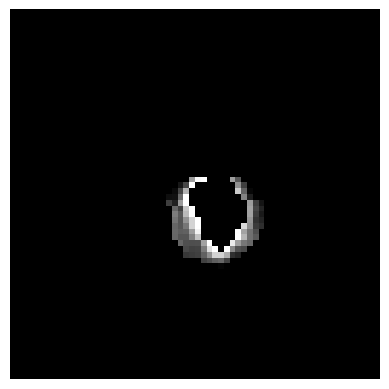

In [82]:

print(final_images.shape)
print(final_labels[13])
plt.imshow(final_images[13], cmap='gray')
plt.axis('off')
plt.show()

